## 사전 준비
- 0. 케글에서 cats and dogs 데이터 셋 다운받기 
<br>(링크: https://www.kaggle.com/c/dogs-vs-cats/data)
- 1. 해당 노트북 파일이 있는 경로에 new_data 폴더/cats_and_dogs_small 폴더 를 생성
- 2. cats_and_dogs_small 폴더 안에 train, test, validation 폴더 각각 생성
- 3. 각 train, test, validation 폴더 안에 cats, dogs 폴더 생성
- 4. cats, dogs 폴더 안에 케글 train 폴더 안에 있던 개, 고양이 사진 넣기
<br> train (0 - 999) : 1000개 , test(1000 - 1499) : 500개 , validation(1500 - 1999) : 500개

In [1]:
import os

In [2]:
# 데이터 확인

train_cats_dir = './new_data/cats_and_dogs_small/train/cats'
train_dogs_dir = './new_data/cats_and_dogs_small/train/dogs'
test_cats_dir = './new_data/cats_and_dogs_small/test/cats'
test_dogs_dir = './new_data/cats_and_dogs_small/test/dogs'
validation_cats_dir = './new_data/cats_and_dogs_small/validation/cats'
validation_dogs_dir = './new_data/cats_and_dogs_small/validation/cats'

# -----------------------------------------------------

print('train(개) 개수 :', len(os.listdir(train_dogs_dir)))
print('train(고양이) 개수 :', len(os.listdir(train_cats_dir)))
print('test(개) 개수 :', len(os.listdir(test_dogs_dir)))
print('test(고양이) 개수 :', len(os.listdir(test_cats_dir)))
print('validation(개) 개수 :', len(os.listdir(validation_dogs_dir)))
print('validation(고양이) 개수 :', len(os.listdir(validation_cats_dir)))

train(개) 개수 : 1000
train(고양이) 개수 : 1000
test(개) 개수 : 500
test(고양이) 개수 : 500
validation(개) 개수 : 500
validation(고양이) 개수 : 500


### generator 통한 이미지 전처리

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 픽셀값을 0 - 255 범위에서 0.0 -1.0 범위로 변경
train_gen = ImageDataGenerator(rescale=1.0/255)
test_gen = ImageDataGenerator(rescale=1.0/255)
validation_gen = ImageDataGenerator(rescale=1.0/255)

# 폴더로부터 데이터를 가져와서 처리
train_dir = './new_data/cats_and_dogs_small/train/'
test_dir = './new_data/cats_and_dogs_small/test/'
validation_dir = './new_data/cats_and_dogs_small/validation/'

train_generator = train_gen.flow_from_directory(
        train_dir,   #데이터를 가져올 폴더
        target_size = (150, 150),    # 이미지 크기를 동일하게 맞춤
        batch_size = 20,          # 한 번에 읽어올 이미지 개수
        class_mode= 'binary'      # 라벨링 방법 (디렉토리 명에서 알파벳 순으로 0부터 라벨링)
                # binary : 0과 1만으로 라벨링
                # categorical : 0부터 폴더 개수만큼 라벨링(원핫 인코딩0)
                # sparse : 0부터 폴더 개수만큼 라벨링(원핫 인코딩X)
)

test_generator = test_gen.flow_from_directory(
        test_dir,   
        target_size = (150, 150),  
        batch_size = 20,   
        class_mode= 'binary'  )

validation_generator = validation_gen.flow_from_directory(
        validation_dir,   
        target_size = (150, 150),  
        batch_size = 20,   
        class_mode= 'binary'  )

C:\Users\SMT002\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SMT002\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SMT002\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SMT002\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

ImportError: cannot import name 'export_saved_model' from 'tensorflow.python.keras.saving.saved_model' (C:\Users\SMT002\anaconda3\lib\site-packages\tensorflow\python\keras\saving\saved_model\__init__.py)

In [4]:
train_generator.class_indices, test_generator.class_indices, validation_generator.class_indices

({'cats': 0, 'dogs': 1}, {'cats': 0, 'dogs': 1}, {'cats': 0, 'dogs': 1})

### 신경망 초기화

In [5]:
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

### 신경망 설계

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout

- CNN 망을 추가 --> 특성 추출해서 요약
- Conv2D() : 컨볼루션 수행
- MaxPooling2D() : 이미지 크기 축소
- Flatten() : 다차원 데이터를 1차원으로 변환
- Dropout() : 과대적합을 방지하기 위해 사용되는 노드를 제한 (0.5 이하)
- padding : 컨볼루션 후에 이미지 크기가 줄어드는 것을 방지 (외곽을 0으로 채움!)
- stride : 필터를 몇 픽셀씩 이동할 것인지 설정

In [7]:
model1 = Sequential()

# CNN 층 ==> 입력층
# 필터 수, 필터 크기, 입력데이터 크기, 활성화 함수
model1.add(Conv2D(32, (3,3), input_shape = (150, 150, 3), 
                  padding='same',
                 activation='relu'))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))


model1.add(Flatten())

# 은닉층

model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.3)) 
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))

# 출력층
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [8]:
# class_mode : binary -> binary_crossentropy
# class_mode : categorical -> categorical_crossentropy
# class_mode : sparse -> sparse_categorical_crossentropy

model1.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [9]:
# validation_steps=total_validate//batch_size,
# steps_per_epoch=total_train//batch_size,

In [10]:
h1 = model1.fit_generator(generator=train_generator,
                             epochs=30,
                             steps_per_epoch=100, # 데이터 개수 --> 배치 사이즈로 나눈 값
                            validation_data = validation_generator,
                            validation_steps = 50
                         )
# 모델 저장
model1.save_weights('./model/cats_and_dogs_001.hdf5')

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 8s 76ms/step - loss: 0.7128 - acc: 0.5390 - val_loss: 0.6841 - val_acc: 0.5500
Epoch 2/30
100/100 [==============================] - 5s 55ms/step - loss: 0.6907 - acc: 0.5460 - val_loss: 0.6846 - val_acc: 0.5640
Epoch 3/30
100/100 [==============================] - 6s 55ms/step - loss: 0.6632 - acc: 0.6305 - val_loss: 0.6424 - val_acc: 0.6570
Epoch 4/30
100/100 [==============================] - 5s 54ms/step - loss: 0.5989 - acc: 0.6925 - val_loss: 0.7237 - val_acc: 0.5260
Epoch 5/30
100/100 [==============================] - 5s 54ms/step - loss: 0.5437 - acc: 0.7390 - val_loss: 0.6520 - val_acc: 0.6660
Epoch 6/30
100/100 [==============================] - 5s 54ms/step - loss: 0.4627 - acc: 0.7785 - val_loss: 0.6644 - val_acc: 0.6870
Epoch 7/30
100/100 [=============

### 결과 시각화 해보기

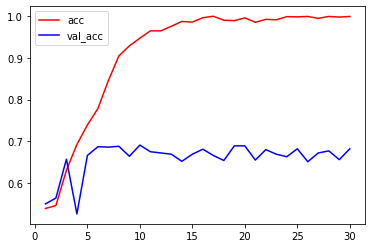

In [11]:
import matplotlib.pyplot as plt

acc = h1.history['acc']
val_acc = h1.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label = 'acc')
plt.plot(epochs, val_acc, 'b', label = 'val_acc')
plt.legend()
plt.show()

Instructions for updating:
Please use Model.predict, which supports generators.
파일명 : cats\cat.1000.jpg
예측결과 : ['고양이']
파일명 : cats\cat.1001.jpg
예측결과 : ['개']
파일명 : cats\cat.1002.jpg
예측결과 : ['고양이']
파일명 : cats\cat.1003.jpg
예측결과 : ['개']
파일명 : cats\cat.1004.jpg
예측결과 : ['고양이']
파일명 : cats\cat.1005.jpg
예측결과 : ['고양이']
파일명 : cats\cat.1006.jpg
예측결과 : ['개']
파일명 : cats\cat.1007.jpg
예측결과 : ['고양이']
파일명 : cats\cat.1008.jpg
예측결과 : ['개']
파일명 : cats\cat.1009.jpg
예측결과 : ['개']


# -------------------------------------------------------------------------------------

## 과대적합 해소 -- 0. Dropout
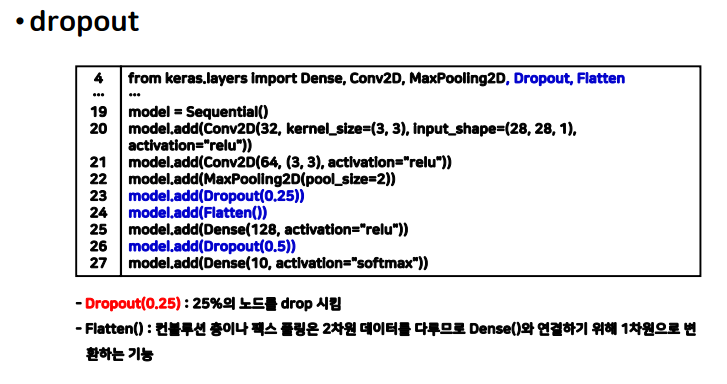

# -------------------------------------------------------------------------------------

## 과대적합 해소 ---  1. 데이터 확장
• rotation_range = 360 : 0° 에서 360° 사이에서 회전 <br>
• width_shift_range = 0.1 : 전체에서 10% 내외 수평이동 <br>
• height_shift_range = 0.1 : 전체에서 10% 내외 수직이동 <br>
• shear_range = 0.5 : 0.5라디안 내외 시계반대방향으로 변형 <br>
• zoom_range = 0.3 : 0.7~1.3배로 축소/확대 <br>
• Horizontal_flip = True : 수평방향으로 뒤집기 <br>
• Vertical_flip = True : 수직방향으로 뒤집기 <br>

### 증식(augmentation)을 통한 데이터 확장
--> 훈련데이터가 부족한 문제를 해결하기 위함

In [13]:
train_gen = ImageDataGenerator(rescale=1.0/255,
                              rotation_range= 20,
                              width_shift_range=0.2,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                               # 확대 시 이미지가 깨지는 문제를 보정
                              fill_mode='nearest')
test_gen = ImageDataGenerator(rescale=1.0/255)
validation_gen = ImageDataGenerator(rescale=1.0/255)

In [14]:
train_generator = train_gen.flow_from_directory(
        train_dir,  
        target_size = (150, 150),   
        batch_size = 20,         
        class_mode= 'binary'     
)

test_generator = test_gen.flow_from_directory(
        test_dir,   
        target_size = (150, 150),  
        batch_size = 20,   
        class_mode= 'binary'  
)

validation_generator = validation_gen.flow_from_directory(
        validation_dir,   
        target_size = (150, 150),  
        batch_size = 20,   
        class_mode= 'binary'  
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
model1.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [16]:
h1 = model1.fit_generator(generator=train_generator,
                             epochs=30,
                             steps_per_epoch=100, # 데이터 개수 --> 배치 사이즈로 나눈 값
                            validation_data = validation_generator,
                            validation_steps = 50
                         )
# 모델 저장
model1.save_weights('./model/cats_and_dogs_002.hdf5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 12s 121ms/step - loss: 0.8362 - acc: 0.6125 - val_loss: 0.6562 - val_acc: 0.6510
Epoch 2/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6314 - acc: 0.6570 - val_loss: 0.6178 - val_acc: 0.6860
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6003 - acc: 0.6760 - val_loss: 0.5955 - val_acc: 0.7080
Epoch 4/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5636 - acc: 0.7145 - val_loss: 0.5926 - val_acc: 0.7010
Epoch 5/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5487 - acc: 0.7305 - val_loss: 0.6656 - val_acc: 0.7020
Epoch 6/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5421 - acc: 0.7290 - val_loss: 0.5783 - val_acc: 0.7330
Epoch 7/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5487 - acc: 0.7295

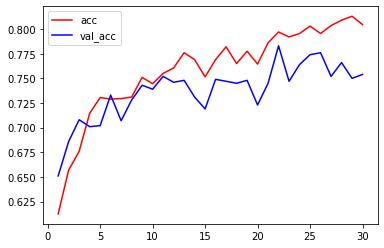

In [17]:
acc = h1.history['acc']
val_acc = h1.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label = 'acc')
plt.plot(epochs, val_acc, 'b', label = 'val_acc')
plt.legend()
plt.show()

## 그래프 오락가락이 심한 이유 ?? : 가짜 데이터(증식된것)를 넣다 보니 틀렸을 때 정확도가 많이 떨어진다

# -------------------------------------------------------------------------------------

## 전이학습 (Transfer Learning) 
- 좋은 모델을 가져다가 붙여서 쓰는 것

In [18]:
# VGG16 다운로드
from tensorflow.keras.applications import VGG16

# weights = 'imagenet' : 초기화할 가중치
# include_top = False : VGG16의 Dense층을 가져올 것인지 여부
# input_shape = (150, 150, 3) : 입력 데이터 크기

conv_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))

In [19]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [20]:
import os
import numpy

In [21]:
train_gen = ImageDataGenerator(rescale=1.0/255)
test_gen = ImageDataGenerator(rescale=1.0/255)
validation_gen = ImageDataGenerator(rescale=1.0/255)

train_dir = './new_data/cats_and_dogs_small/train/'
test_dir = './new_data/cats_and_dogs_small/test/'
validation_dir = './new_data/cats_and_dogs_small/validation/'

In [22]:
# VGG 16을 이용해서 특성 추출
def extract_feature(directory, cnt, bat_size) :
    # VGG16 결과로 받을 최종 특성
    feature = np.zeros(shape = (cnt, 4, 4, 512 )) 
    # --> shape : VGG16에서 넘어온 데이터(None, 4, 4, 512) 를 넣어줌
    # 라벨의 수
    label = np.zeros(shape = cnt)
    # --> shape : 넘어오는 이미지 수 만큼
    
    train_generator = train_gen.flow_from_directory(
            directory,  
            target_size = (150, 150),   
            batch_size = bat_size,         
            class_mode= 'binary'     
    )
    
    i = 0 #(카운트)
    
    # VGG16에서 predict() 함수를 이용해 배치 사이즈만큼 
    # 이미지의 특성과 라벨을 가져옴
    # generate 결과 -- > 이미지와 라벨(0:cat,1:dog)이 넘어옴
    for input_batch, label_batch in train_generator :     # input_batch : 넘어온 이미지 데이터, label_batch : 넘어온 라벨 데이터
        # feature 값 뽑는 법 ? 
        # : VGG에 generator에서 넘어온 이미지 데이터를 넣어줌
        feature_batch = conv_base.predict(input_batch)             # predict() : 추출된 특성맵 반환
        feature[i*bat_size : (i+1)*bat_size] = feature_batch  # 특성 개수 x 배치 사이즈(20) 
        # i 를 카운트하며 첫번째 ~ 스무번째 , 두번째 ~ 돌면서 채움
        label[i*bat_size : (i+1)*bat_size] = label_batch
        
        i = i + 1       # batch size 가 20이고, 이미지 개수가 2000개 이므로 i는 100번 돌게 된다.
        
        if i*bat_size >= cnt : # i*20이 넘어온 이미지 개수보다 커지면 중지
            break
    return feature, label


In [23]:
# train_dir에 있는 2000개의 데이터, batch size 20
train_feature , train_label = extract_feature(train_dir, 2000, 20)  
test_feature , test_label = extract_feature(test_dir, 1000, 20)  
validation_feature , validation_label = extract_feature(validation_dir, 1000, 20)  

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
# VGG에서 넘어온 데이터를 Dense()에 맞도록 변경
train_feature = np.reshape(train_feature, (2000, 4*4*512))
test_feature = np.reshape(test_feature, (1000, 4*4*512))
validation_feature = np.reshape(validation_feature, (1000, 4*4*512))

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [26]:
model = Sequential()

model.add(Dense( 512 , input_dim = 4*4*512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense( 256 , activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense( 128 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense( 64 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [27]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [28]:
h3 = model.fit(train_feature, train_label,
                             epochs=20,
                             batch_size=20,
                            validation_data = (validation_feature, validation_label)
                         )
# 모델 저장
# model.save_weights('./model/cats_and_dogs_003.hdf5')

Train on 2000 samples, validate on 1000 samples
Epoch 1/20
2000/2000 [==============================] - 1s 422us/sample - loss: 0.5687 - acc: 0.7285 - val_loss: 0.2990 - val_acc: 0.8650
Epoch 2/20
2000/2000 [==============================] - 0s 193us/sample - loss: 0.3160 - acc: 0.8650 - val_loss: 0.2991 - val_acc: 0.8590
Epoch 3/20
2000/2000 [==============================] - 0s 198us/sample - loss: 0.2343 - acc: 0.9095 - val_loss: 0.2782 - val_acc: 0.8750
Epoch 4/20
2000/2000 [==============================] - 0s 201us/sample - loss: 0.2005 - acc: 0.9220 - val_loss: 0.3091 - val_acc: 0.8770
Epoch 5/20
2000/2000 [==============================] - 0s 195us/sample - loss: 0.1543 - acc: 0.9415 - val_loss: 0.3565 - val_acc: 0.8760
Epoch 6/20
2000/2000 [==============================] - 0s 212us/sample - loss: 0.1157 - acc: 0.9555 - val_loss: 0.4269 - val_acc: 0.8750
Epoch 7/20
2000/2000 [==============================] - 0s 212us/sample - loss: 0.1203 - acc: 0.9580 - val_loss: 0.3058 - va

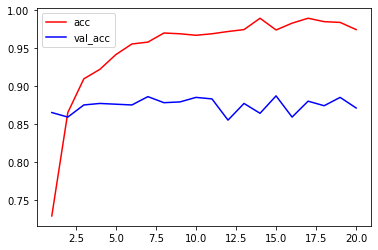

In [29]:
import matplotlib.pyplot as plt

acc = h3.history['acc']
val_acc = h3.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label = 'acc')
plt.plot(epochs, val_acc, 'b', label = 'val_acc')
plt.legend()
plt.show()

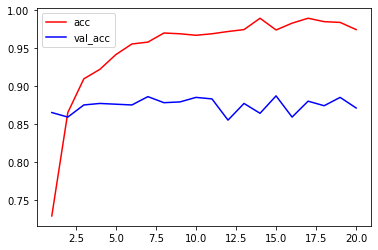

In [30]:
import matplotlib.pyplot as plt

acc = h3.history['acc']
val_acc = h3.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label = 'acc')
plt.plot(epochs, val_acc, 'b', label = 'val_acc')
plt.legend()
plt.show()

### 데이터 증식을 사용하여 특성추출 방식의 전이학습

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))

model = Sequential()

# VGG16 모델의 Convnet을 그대로 추가
model.add(conv_base)

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


### 동결
: 전이학습으로 가져온 모델의 파라미터가 업데이트되지않도록 방지하는 것

In [32]:
print(' 동결 전 훈련되는 가중치 개수 :', len(model.trainable_weights))

 동결 전 훈련되는 가중치 개수 : 30


In [33]:
# 동결
conv_base.trainable = False
print(' 동결 후 훈련되는 가중치 개수 :', len(model.trainable_weights))

 동결 후 훈련되는 가중치 개수 : 4


#### 증식 사용

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1.0/255,
                              rotation_range= 20,
                              width_shift_range=0.2,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                               # 확대 시 이미지가 깨지는 문제를 보정
                              fill_mode='nearest')
test_gen = ImageDataGenerator(rescale=1.0/255)
validation_gen = ImageDataGenerator(rescale=1.0/255)

In [35]:
train_generator = train_gen.flow_from_directory(
        train_dir,  
        target_size = (150, 150),   
        batch_size = 20,         
        class_mode= 'binary'     
)

test_generator = test_gen.flow_from_directory(
        test_dir,   
        target_size = (150, 150),  
        batch_size = 20,   
        class_mode= 'binary'  
)

validation_generator = validation_gen.flow_from_directory(
        validation_dir,   
        target_size = (150, 150),  
        batch_size = 20,   
        class_mode= 'binary'  
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

h4 = model.fit(train_generator,
               epochs=20,
               steps_per_epoch=100,
            validation_data = validation_generator,
            validation_steps=50)
# 모델 저장
model.save_weights('./model/cats_and_dogs_004.hdf5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 13s 126ms/step - loss: 0.5712 - acc: 0.7420 - val_loss: 0.3060 - val_acc: 0.8670
Epoch 2/20
100/100 [==============================] - 12s 119ms/step - loss: 0.3691 - acc: 0.8360 - val_loss: 0.2800 - val_acc: 0.8870
Epoch 3/20
100/100 [==============================] - 12s 119ms/step - loss: 0.3457 - acc: 0.8575 - val_loss: 0.3061 - val_acc: 0.8580
Epoch 4/20
100/100 [==============================] - 12s 120ms/step - loss: 0.3150 - acc: 0.8690 - val_loss: 0.2516 - val_acc: 0.8940
Epoch 5/20
100/100 [==============================] - 12s 119ms/step - loss: 0.3037 - acc: 0.8740 - val_loss: 0.2628 - val_acc: 0.8950
Epoch 6/20
100/100 [==============================] - 12s 120ms/step - loss: 0.2787 - acc: 0.8825 - val_loss: 0.2808 - val_acc: 0.8770
Epoch 7/20
100/100 [==============================] - 12s 120ms/step - loss: 0.2856 - acc: 0.8795

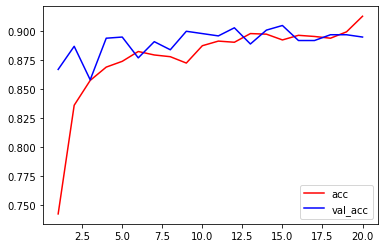

In [37]:
import matplotlib.pyplot as plt

acc = h4.history['acc']
val_acc = h4.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label = 'acc')
plt.plot(epochs, val_acc, 'b', label = 'val_acc')
plt.legend()
plt.show()

### 미세조정을 이용한 전이학습
- 미세 조정 : 가져온 모델의 하단 층 일부만 업데이트 되도록 하는것

In [38]:
conv_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))

In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [40]:
# block 5만 동결을 품
conv_base.trainable = True

set_trainable = False

# layer를 하나씩 가져와 이름이 block5_conv1인 레이어부터 동결을 해제
for layer in conv_base.layers :        # 층을 하나씩 가져오자.
    if layer.name == 'block5_conv1' :             # 레이어 이름이 'block5_conv1'인지 확인!
        set_trainable = True   
        
    if set_trainable :         # set_Trainable이 true일 때??
        layer.trainable = True
    else :
        layer.trainable = False  # set_Trainable이 false일 때 동결

In [41]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

h5 = model.fit(train_generator,
               epochs=20,
               steps_per_epoch=100,
            validation_data = validation_generator,
            validation_steps=50)
# 모델 저장
model.save_weights('./model/cats_and_dogs_005.hdf5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 13s 129ms/step - loss: 0.2529 - acc: 0.8930 - val_loss: 0.2727 - val_acc: 0.8960
Epoch 2/20
100/100 [==============================] - 12s 122ms/step - loss: 0.2367 - acc: 0.8990 - val_loss: 0.2500 - val_acc: 0.8950
Epoch 3/20
100/100 [==============================] - 12s 122ms/step - loss: 0.2124 - acc: 0.9125 - val_loss: 0.2501 - val_acc: 0.9020
Epoch 4/20
100/100 [==============================] - 12s 121ms/step - loss: 0.2439 - acc: 0.8990 - val_loss: 0.2571 - val_acc: 0.8940
Epoch 5/20
100/100 [==============================] - 12s 123ms/step - loss: 0.2229 - acc: 0.9050 - val_loss: 0.2944 - val_acc: 0.8870
Epoch 6/20
100/100 [==============================] - 12s 121ms/step - loss: 0.2068 - acc: 0.9105 - val_loss: 0.2526 - val_acc: 0.9050
Epoch 7/20
100/100 [==============================] - 12s 120ms/step - loss: 0.2247 - acc: 0.8990

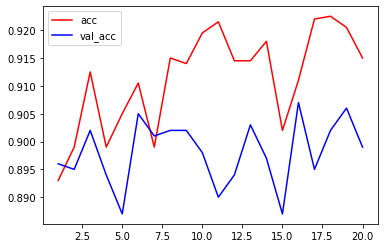

In [42]:
import matplotlib.pyplot as plt

acc = h5.history['acc']
val_acc = h5.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label = 'acc')
plt.plot(epochs, val_acc, 'b', label = 'val_acc')
plt.legend()
plt.show()